In [62]:
import logging

import pandas as pd
from backtester.strategy_paper import PaperStrategy
from load_data import load_data
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

from mpl_bsic import apply_bsic_logo, apply_bsic_style, check_figsize
from mpl_bsic.apply_bsic_style import DEFAULT_TITLE_STYLE

log = logging.getLogger("backtester")
log.setLevel(20)

In [2]:
path = "../results/results_paper.xlsx"
output_cols = ["Return", "Vol", "Skew", "Kurtosis", "Hit Ratio", "Sharpe"]
writer = pd.ExcelWriter(path, engine="xlsxwriter")


def save(df: pd.DataFrame, sheet_name: str):
    df.columns = output_cols
    df.to_excel(writer, sheet_name)

In [3]:
fx_fixes, swaps_fixes, cpi_data, real_swaps_fixes = load_data('../data/')

In [4]:
MA_WINDOW = 2
REBAL_THRESHOLD = 1

BT_FX = fx_fixes
BT_SWAPS = swaps_fixes

bt_st = PaperStrategy(
    BT_FX, BT_SWAPS, ma_window=MA_WINDOW, rebalancing_threshold=REBAL_THRESHOLD
)
bt_st.run()
perf_st = bt_st.compute_stats()

save(perf_st, 'short_term')

INFO:backtester:Rebalancing 43760.0 times out of 62280.0 (35.13%)


In [5]:
MA_WINDOW = 15

bt_lt = PaperStrategy(
    BT_FX, BT_SWAPS, ma_window=MA_WINDOW, rebalancing_threshold=REBAL_THRESHOLD
)
bt_lt.run()
perf_lt = bt_lt.compute_stats()

save(perf_lt, 'long_term')

INFO:backtester:Rebalancing 27480.0 times out of 62280.0 (22.06%)


In [6]:
writer.close()

In [ ]:
import seaborn as sns

sns.displot

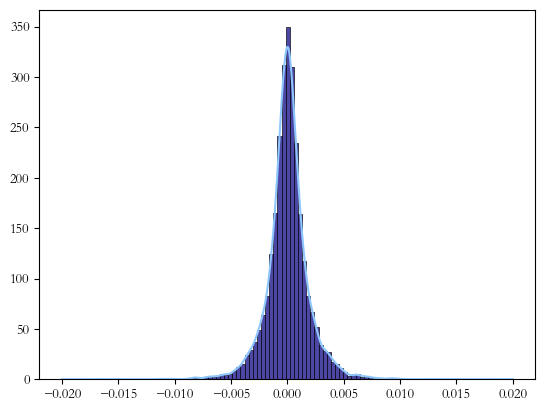

In [137]:
pnl_lt = bt_lt.pnl

xx = np.linspace(-0.02, 0.02, 1000)
kde = stats.gaussian_kde(pnl_lt["total_pct"])

plt.hist(pnl_lt["total_pct"], bins=100, density=True, alpha=.9, edgecolor="black", lw=0.5)
plt.plot(xx, kde(xx), alpha=1)

In [117]:
from matplotlib.axes import Axes


def plot_returns_dist():
    w, h = (7.32,3) 
    fig, axs = plt.subplots(1, 2, figsize=(w,h))
    check_figsize(w,h, None)
    axs: list[Axes]

    ax2000, ax2010 = axs
    ax2000.set_title("2000-2010")
    ax2010.set_title("2010-2020")

    fig.suptitle('Returns Distributions', **DEFAULT_TITLE_STYLE, y=1.025)

    apply_bsic_logo(fig, ax2000, scale=0.02)
    apply_bsic_style(fig,ax2000)
    apply_bsic_style(fig,ax2010)

    pnl_2000 = pnl_lt.loc["2000":"2010", 'total_pct']
    ax2000.hist(pnl_2000, bins=100, density=True)
    ax2000.set_yticks([])

    pnl_2010 = pnl_lt.loc["2010":"2020", 'total_pct']
    ax2010.hist(pnl_2010, bins=100, density=True)
    ax2010.set_yticks([])

    fig.subplots_adjust(wspace=0.05)

    return fig

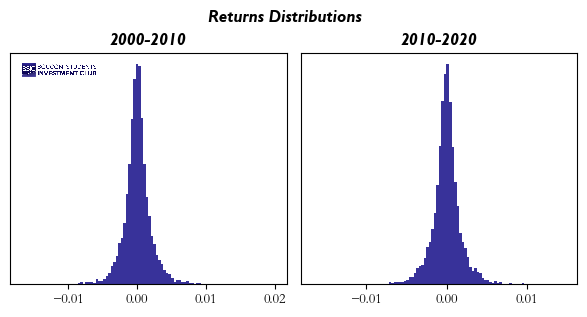

In [118]:
fig = plot_returns_dist()

In [110]:
fig.savefig('returns.svg', bbox_inches='tight', dpi=1200)

# Robustness Checks

In [145]:
paper_rc = pd.read_excel('../results/robustness_checks.xlsx', sheet_name='paper', index_col=0)

paper_rc.head()

,Total,2000s,2010s
2,0.102771,1.049014,-0.575450
3,0.341608,1.260514,-0.367097
4,0.593001,1.434982,-0.195498
5,0.605392,1.416076,-0.234140
6,0.572226,1.294305,-0.151640


<Axes: title={'center': 'SR against window size'}, xlabel='Window', ylabel='SR'>

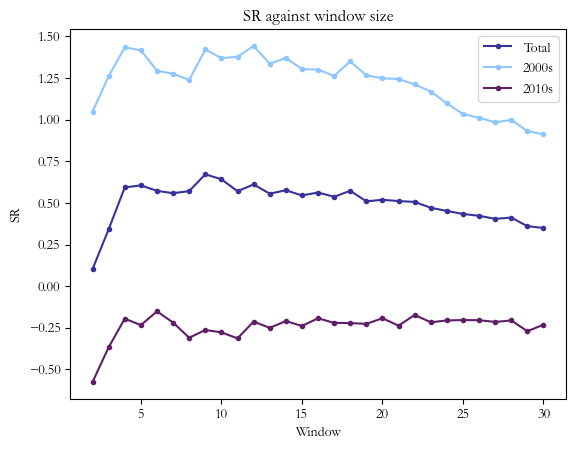

In [167]:
paper_rc.plot(marker='.', xlabel='Window', ylabel='SR', title='SR against window size')

# Factor Analysis

In [168]:
pnl = bt_lt.pnl

In [169]:
# import factors

In [170]:
# run regressions and shit